In [1]:
import os
os.chdir("..")
print(os.getcwd())

/Users/rosinatorres/Documents/PhD/WP1/Project/Code/MS2LDA/MS2LDA


In [2]:
from Preprocessing.load_and_clean import load_mgf
from Preprocessing.load_and_clean import clean_spectra
#from matchms import Spectrum
from matchms.filtering import add_losses
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Preprocessing
spectra_path = "test_data/GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf"
spectra = load_mgf(spectra_path)
spectra = clean_spectra(spectra)
spectra=spectra[:5]
len(spectra)

5

In [ ]:
spectrum_1 = Spectrum(mz=np.array([100, 150, 200.]),
                      intensities=np.array([0.7, 0.2, 0.1]),
                      metadata={'id': 'spectrum1',
                                'precursor_mz': 201.})
spectrum_2 = Spectrum(mz=np.array([100, 140, 190.]),
                        intensities=np.array([0.4, 0.2, 0.1]),
                        metadata={'id': 'spectrum2',
                                  'precursor_mz': 233.})
spectrum_3 = Spectrum(mz=np.array([110, 140, 195.]),
                        intensities=np.array([0.6, 0.2, 0.1]),
                        metadata={'id': 'spectrum3',
                                  'precursor_mz': 214.})
spectrum_4 = Spectrum(mz=np.array([100, 150, 200.]),
                        intensities=np.array([0.6, 0.1, 0.6]),
                        metadata={'id': 'spectrum4',
                                  'precursor_mz': 265.})
    
spectra = [add_losses(spectrum_1), add_losses(spectrum_2), add_losses(spectrum_3), add_losses(spectrum_4)]


for spectrum in spectra:
    peak_list = spectrum.peaks.mz
    loss_list = spectrum.losses.mz
    int_peak_list = spectrum.peaks.intensities
    int_losses_list = spectrum.losses.intensities
    print(peak_list, loss_list, int_peak_list, int_losses_list)


[100. 150. 200.] [  1.  51. 101.] [0.7 0.2 0.1] [0.1 0.2 0.7]
[100. 140. 190.] [ 43.  93. 133.] [0.4 0.2 0.1] [0.1 0.2 0.4]
[110. 140. 195.] [ 19.  74. 104.] [0.6 0.2 0.1] [0.1 0.2 0.6]
[100. 150. 200.] [ 65. 115. 165.] [0.6 0.1 0.6] [0.6 0.1 0.6]


In [14]:
# Example list
peak_list = [98.730972, 101.785851, 102.04705]  # This would be similar to spectrum.peaks.mz[:2]

# Round each element to two decimal places
rounded_peak_list = [round(x, 2) for x in peak_list]

print(rounded_peak_list)

for spectrum in spectra:
    peak_list = spectrum.peaks.mz[:2]
    rounded_peak_list = [round(x, 2) for x in peak_list]
    loss_list = spectrum.losses.mz[:2]
    rounded_loss_list =  [round(x, 2) for x in loss_list]
    int_peak_list = spectrum.peaks.intensities[:2]
    rounded_int_peak_list =  [round(x, 2) for x in int_peak_list]
    int_losses_list = spectrum.losses.intensities[:2]
    rounded_int_losses_list =  [round(x, 2) for x in int_losses_list]
    print(rounded_peak_list, rounded_loss_list, rounded_int_peak_list, rounded_int_losses_list)


[98.73, 101.79, 102.05]
[98.73, 101.79] [1.02, 15.99] [0.01, 0.02] [0.01, 0.01]
[95.03, 95.13] [0.13, 0.28] [0.0, 0.0] [0.0, 0.0]
[95.17, 95.22] [43.32, 164.08] [0.0, 0.0] [0.0, 0.01]
[95.19, 95.43] [12.03, 98.36] [0.01, 0.0] [0.01, 0.01]
[96.32, 97.48] [5.61, 41.22] [0.01, 0.0] [0.0, 0.0]


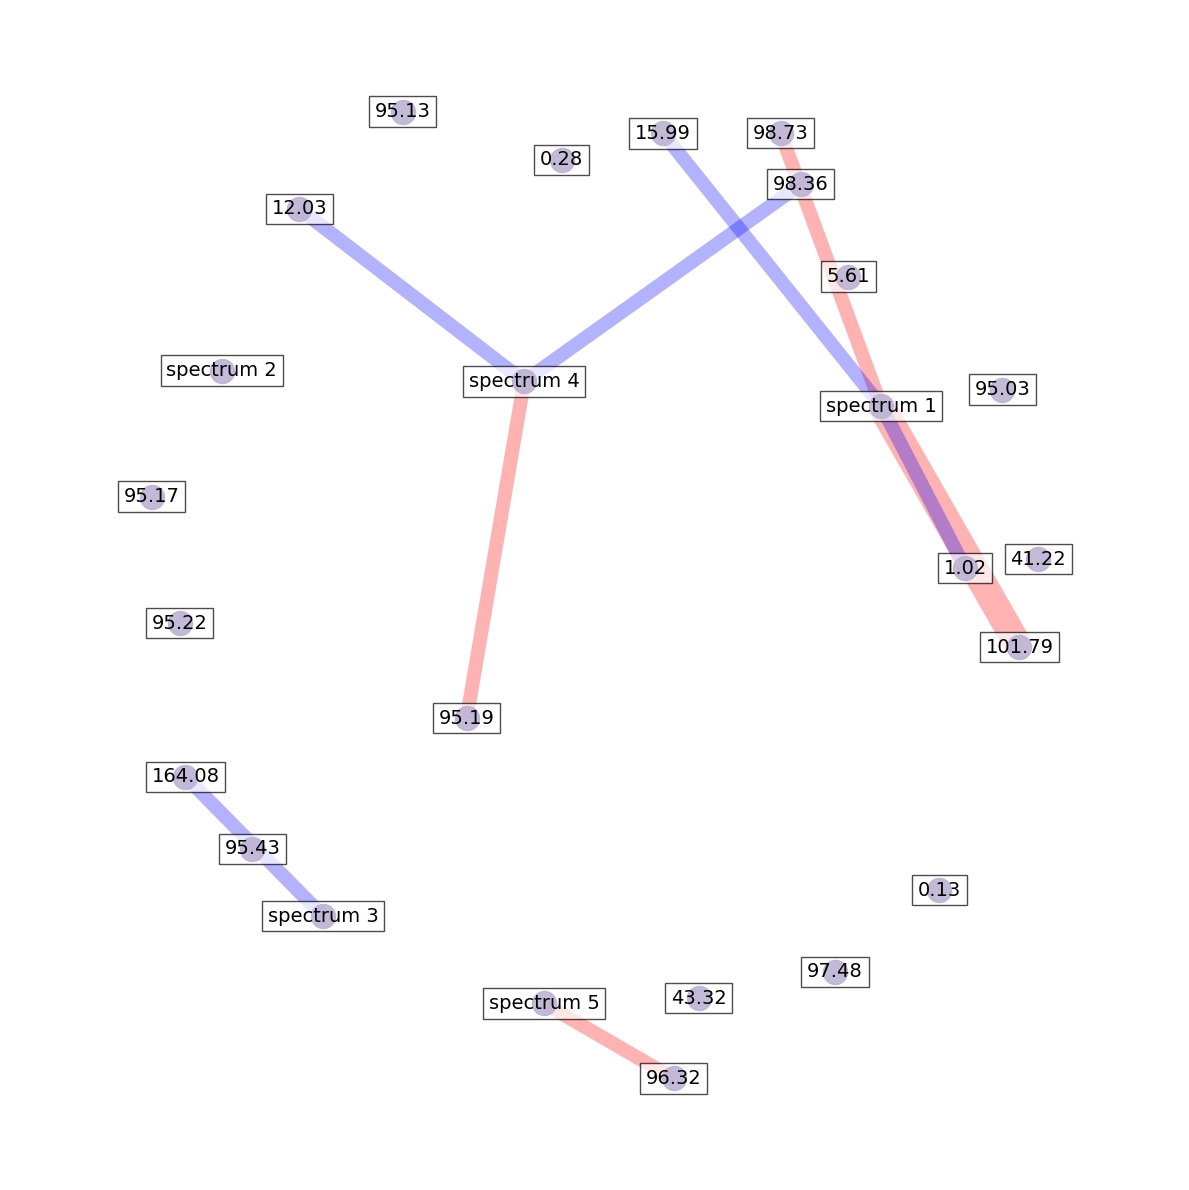

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

for i, spectrum in enumerate(spectra, start=1):
    G.add_node(f'spectrum {i}')
    peak_list = spectrum.peaks.mz[:2]
    rounded_peak_list = [round(x, 2) for x in peak_list]
    loss_list = spectrum.losses.mz[:2]
    rounded_loss_list =  [round(x, 2) for x in loss_list]
    int_peak_list = spectrum.peaks.intensities[:2]
    rounded_int_peak_list =  [round(x, 2) for x in int_peak_list]
    int_losses_list = spectrum.losses.intensities[:2]
    rounded_int_losses_list =  [round(x, 2) for x in int_losses_list]
    
    for edge, weight in zip(rounded_peak_list, rounded_int_peak_list):
        G.add_edge(f'spectrum {i}', edge, weight=weight, color='red')
    for edge, weight in zip(rounded_loss_list, rounded_int_losses_list):
        G.add_edge(f'spectrum {i}', edge, weight=weight, color='blue')

fig, ax = plt.subplots(figsize=(12, 12))
edges = G.edges(data=True)
weights = [d['weight'] * 1000 for (u, v, d) in edges]  
edge_colors = [d['color'] for (u, v, d) in edges]    


pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=edge_colors)#, edge_color="m")
nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options)
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

 